<a href="https://colab.research.google.com/github/Coyote-Schmoyote/breast-cancer-clf-model/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting breast cancer using a machine learning model

This notebooks looks into using various Python-based machine learning anddata science libraries in an attempt to build a machine learning model capable of predicting whether or not somebody has breast cancer.

## 1. Problem definition
The problem presented in this notebook is based on an exercise from 「東京大学のデータサイエンティスト育成講座」. In the original exercise, the accuracy score of the breast cancer prediciton model was 95.8%. The goal in this notebook is to improve the accuracy.

## 2. Data
The data contains information of breat cancer patients, and is donated in 1995 by the University of Wisconsin. It has 569 samples with 32 attributes. 
This data set is built in scikit-learn, and can be imported using `from sklearn.datasets import load_breast_cancer`.
**More information about data set:** https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic) 

## 3. Features
Attribute information:
* ID number
* Diagnosis (M = malignant, B = benign)
* 3-32: Ten real-valued features are computed for each cell nucleus:
 * a) radius (mean of distances from center to points on the perimeter)
 * b) texture (standard deviation of gray-scale values)
 * c) perimeter
 * d) area
  * e) smootness (local variation in radius lengths)
  * f) compactness (perimeter^2 / area - 1.0)
  * g) concavity (severity of concave portions of the contour)
  * h) concave points (number of concave portions of the contour)
  * i) symmetry
  * j) fractal dimension ("coastline approximation" -1)

## 4. Evaluation
The project will be considered successful if we reach accuracy score higher than 95.8% at predicting whether the patient has a malignant or benign tumor.

### Import all the tools




In [1]:
# import regular libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import models from Scikit-learn
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# import model evaluation tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# import data
from sklearn.datasets import load_breast_cancer





### Scikit-Learn built-in datasets

Scikit-Learn has 7 of built-in datasets (also called "toy datasets") that we can use for machine learning projects. The main advantage of the Scikit-Learn datasets is that they are clean and ready to use right away. Using these datasets, we don‘t have to spend time prepraing and transforming the data as much as we would using other datasets. 
**More about `load_breast_cancer` dataset** : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html?highlight=load_breast_cancer



In [2]:
# save and view the data set 
data = load_breast_cancer()

data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

Hmm... What is this? So, the only problem with the Scikit-Learn datasets is that they don‘t return the data in a tabular format that we are used to. Instead, in returns a `bunch` object.
A `bunch object` is, essentially, a dictionary. Similarly to usual dictionaries, a `bunch`
 object also as `keys` (words) and `values` (definitions).

In [15]:
# let‘s see the keys
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

We got 7 keys:
* `data`: array of all the feature data
* `target`: array of the target data (the variable that we want to predict)
> `data` and `target` is the actual data. 
* `frame`: shape of the data
* `target_names`: list of target classes names  
* `DESCR`: string with the full description of the dataset
* `feature_names`: list of dataset column names
* `filename`: strin with a path to the data locaiton
> these keys serve a descriptive purpose, and we don‘t really use it when building the model.

In [17]:
# look at DESCR key‘s value
data.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

To make the dataset exploration easier, let‘s convert it to `pandas.DataFrame`

In [19]:
# Turn the feature data into a dataframe
df = pd.DataFrame(data.data, 
                  columns = data.feature_names)

# Add the target columns, and fill it with the target data
df["target"] = data.target

# Show the dataframe
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [21]:
# See the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [22]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

### Observations: 
* All data is numerical. It means that we don‘t have to spent time converting categorical datatypes to numerical ones. 
* There are no missing values, so we don‘t have to worry about accounting for the missing data.
>All scikit-learn‘s built-in datasets are fully numerical, and nave no missing values, which make them very easy to use.

**List of Scikit-Learn toy datasets:** https://scikit-learn.org/stable/datasets/toy_dataset.html

## Data Visualization
Data visualization is a great tool to understand our data better. Let‘s use it to our advantage and exlore plot some of the features.

### Matplotlib plot

In [26]:
# see the target value counts
df["target"].value_counts()

1    357
0    212
Name: target, dtype: int64

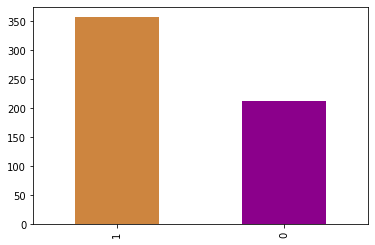

In [34]:
# plot value counts
df["target"].value_counts().plot(kind="bar", color=["peru", "darkmagenta"]);

### Correlation matrix

In [35]:
# correlation matrix
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


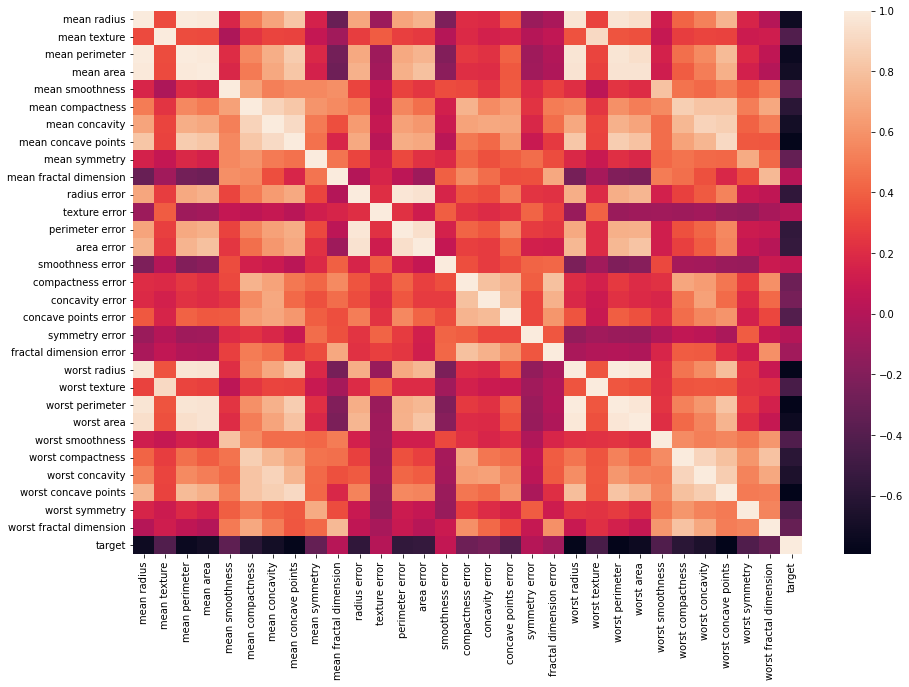

In [38]:
# Make the correlation matrix more visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 fmt=".2f")

## Split data into train and test sets


In [39]:
# store data in X and y variables
X = data.data
y = data.target

# Split the data using Scikit-Learn‘s train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

array([[1.328e+01, 1.372e+01, 8.579e+01, ..., 9.173e-02, 2.736e-01,
        7.320e-02],
       [9.668e+00, 1.810e+01, 6.106e+01, ..., 2.500e-02, 3.057e-01,
        7.875e-02],
       [1.370e+01, 1.764e+01, 8.776e+01, ..., 9.077e-02, 2.518e-01,
        6.960e-02],
       ...,
       [1.979e+01, 2.512e+01, 1.304e+02, ..., 1.732e-01, 3.305e-01,
        8.465e-02],
       [9.333e+00, 2.194e+01, 5.901e+01, ..., 2.564e-02, 2.435e-01,
        7.393e-02],
       [2.573e+01, 1.746e+01, 1.742e+02, ..., 2.756e-01, 3.690e-01,
        8.815e-02]])

## Choosing a Machine Learning Model

* **Logistic Regression**
* **KNN**
* **Random Forest**